Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [51]:
df = pd.read_csv('portfolios.csv')
df_simple = pd.DataFrame()

Normalizando Valores

In [72]:
df['SMA42'] = MinMaxScaler().fit_transform(df[['SMA42']])
df['SMA150'] = MinMaxScaler().fit_transform(df[['SMA150']])
df['RSI'] = MinMaxScaler().fit_transform(df[['RSI']])
df['VAR'] = MinMaxScaler().fit_transform(df[['VAR']])
df_simple['SMA'] = (df['SMA42'] + df['SMA150'])
df_simple['VAR-RSI'] = (df['RSI'] + df['VAR'])
df_simple['SMA'] = MinMaxScaler().fit_transform(df_simple[['SMA']])
df_simple['VAR-RSI'] = MinMaxScaler().fit_transform(df_simple[['VAR-RSI']])

In [73]:
df_simple.describe()


,SMA,VAR-RSI,class
count,90.000000,90.000000,90.000000
mean,0.395973,0.568917,1.022222
std,0.194150,0.191758,0.847704
min,0.000000,0.000000,0.000000
25%,0.289136,0.440198,0.000000
50%,0.376725,0.565557,1.000000
75%,0.469369,0.704890,2.000000
max,1.000000,1.000000,2.000000


Criando Modelo

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_simple.drop(columns='class'))

KMeans(n_clusters=3)

Gerando Visualização

No handles with labels found to put in legend.


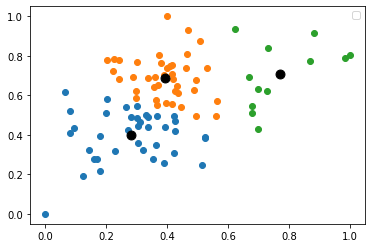

In [83]:
predict = kmeans.labels_
df_simple['class'] = predict
u_labels = np.unique(predict)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(df_simple[df_simple['class']==i]['SMA'],df_simple[df_simple['class']==i]['VAR-RSI'])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()